# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [89]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,632,86,44,70,140,64,6,148,45,19,145,170,322,185,82,10,1,181,183
1,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
2,837,94,46,77,169,60,8,158,42,20,148,181,373,181,67,12,2,193,199
3,517,107,54,108,228,68,12,218,31,25,170,223,700,224,67,13,25,190,204
4,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
5,233,100,52,104,189,59,10,208,32,24,163,220,642,197,70,1,22,187,198
6,390,86,42,65,113,50,8,152,45,19,141,169,332,171,85,4,16,179,183
7,731,103,52,103,170,52,7,236,28,26,160,254,816,250,82,3,23,183,184
8,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
9,788,115,52,100,203,62,10,217,31,24,165,229,697,214,72,14,4,188,197


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [90]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,411.207650,93.785064,45.074681,82.358834,168.143898,61.222222,8.459016,169.504554,40.874317,20.661202,148.577413,188.799636,443.919854,175.868852,72.369763,6.402550,12.358834,188.748634,195.504554
std,245.649112,8.405837,6.277921,16.061487,32.364361,6.626491,3.869761,34.268456,8.021905,2.668067,14.799016,31.752808,182.195794,32.704733,7.177359,5.010215,8.993135,6.047155,7.367471
min,1.000000,73.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,198.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,151.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,401.000000,92.000000,44.000000,80.000000,164.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,622.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,217.000000,605.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,252.000000,126.000000,52.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,264.000000,127.000000,22.000000,39.000000,204.000000,211.000000


In [91]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


In [92]:
classes = np.unique(y_train)
classes

array(['bus', 'opel', 'saab', 'van'], dtype=object)

### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

**I will standardize the data so as to increase the speed of lerning and to avoid numerical overflow.**

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
std_data = StandardScaler().fit_transform(data)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(std_data, target, test_size=0.35)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, accuracy_score, auc
from sklearn.preprocessing import label_binarize

Finding out the optimal parameters for Logistic Regression using Grid Search.

In [96]:
parameters = {'clf__C': np.linspace(0.01, 10, 10),
              'clf__penalty': ['l1', 'l2']}

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000))])

clf = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [97]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.8s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi_class='mul

In [102]:
# used in pat 2.8
best_log_reg = clf.best_estimator_
best_lr_c = clf.best_params_['clf__C']
best_lr_penalty = clf.best_params_['clf__penalty']

print("best accuracy: ", clf.best_score_)
print("best params: ", clf.best_params_)

best accuracy:  0.8105646630236795
best params:  {'clf__C': 1.12, 'clf__penalty': 'l1'}


In [103]:
y_score = best_log_reg.predict(X_test)

f1_micro = f1_score(y_test, y_score, average='micro')
print(f"f1_micro: {f1_micro}")

f1_macro = f1_score(y_test, y_score, average='macro')
print(f"f1_macro: {f1_macro}")

accuracy = accuracy_score(y_test, y_score)
print(f"accuracy: {accuracy}")

f1_micro: 0.7878787878787878
f1_macro: 0.7816105751390999
accuracy: 0.7878787878787878


In [104]:
y_score_bin = label_binarize(best_log_reg.predict(X_test), classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

AUC for bus: 0.964895844814284


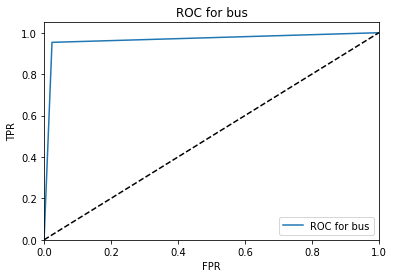

AUC for opel: 0.7383333333333334


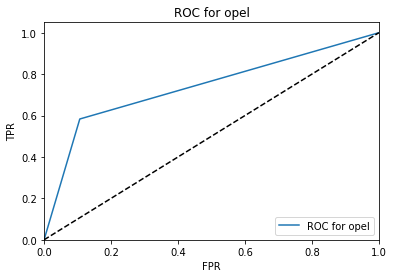

AUC for saab: 0.7553595911753708


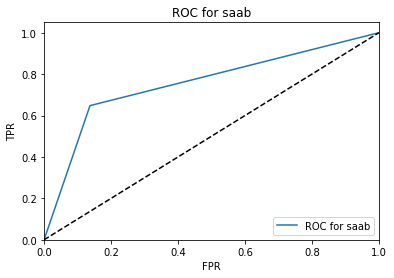

AUC for van: 0.9640380169535062


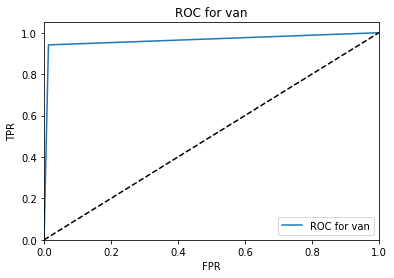

In [105]:
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC for {classes[i]}")
    print(f"AUC for {classes[i]}: {roc_auc[i]}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC for {classes[i]}')
    plt.legend(loc="lower right")
    plt.show()

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [106]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

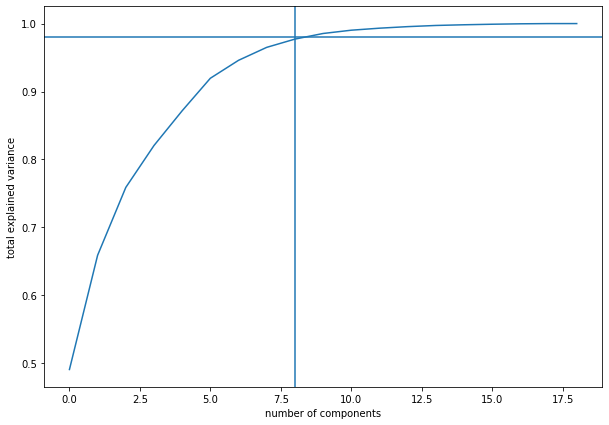

In [107]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('total explained variance')
plt.axvline(8)
plt.axhline(0.98)
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

**We will take 10 components, since the total explained variance >= 0.98 starting from 8 components (see the plot above).**

In [108]:
pca = PCA(n_components=8)
pca.fit(X_train_std)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [109]:
params = {'C': np.linspace(0.01, 10, 10), 'penalty': ['l1', 'l2']}

log_reg_pca_cv = GridSearchCV(
    LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100000),
    params,
    cv=6
)
log_reg_pca_cv.fit(X_train_std_pca, y_train_std)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
print(log_reg_pca_cv.best_params_)
print(f"best accuracy: {log_reg_pca_cv.best_score_}")

{'C': 4.45, 'penalty': 'l2'}
best accuracy: 0.644808743169399


In [111]:
y_score = log_reg_pca_cv.predict(X_test_std_pca)

f1_micro = f1_score(y_test_std, y_score, average='micro')
print(f"f1_micro: {f1_micro}")
f1_macro = f1_score(y_test_std, y_score, average='macro')
print(f"f1_macro: {f1_macro}")
accuracy = accuracy_score(y_test_std, y_score)
print(f"accuracy: {accuracy}")

f1_micro: 0.5824915824915825
f1_macro: 0.5695353111979676
accuracy: 0.5824915824915825


In [112]:
y_score_bin = label_binarize(y_score, classes=classes)
y_test_bin = label_binarize(y_test_std, classes=classes)

AUC for bus: 0.8117283950617284


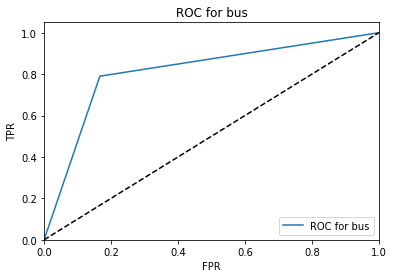

AUC for opel: 0.5937127887592284


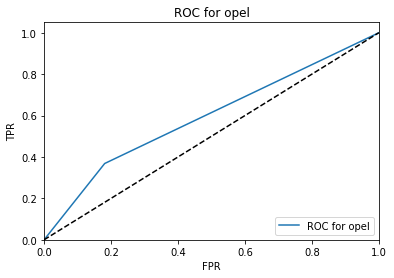

AUC for saab: 0.5857142857142857


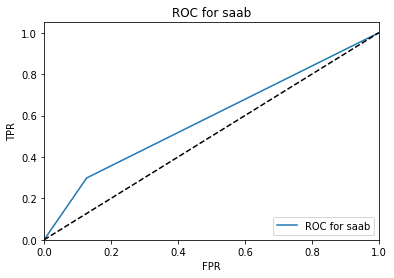

AUC for van: 0.9175824175824174


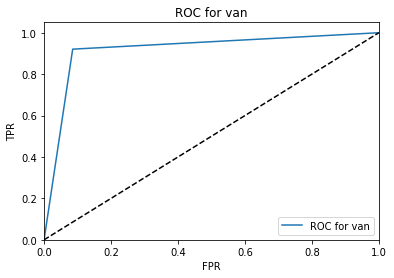

In [113]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC for {classes[i]}")
    print(f"AUC for {classes[i]}: {roc_auc[i]}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC for {classes[i]}')
    plt.legend(loc="lower right")
    plt.show()

**Conclusion:**

Although PCA improves the speed of learning, the acuracy is decreasing dramatically.

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [140]:
from sklearn.tree import DecisionTreeClassifier

Using Desision Tree classifier on the original (standartized) data. Finding out the optima max depth using Grid Search.

In [141]:
params = {'max_depth': range(1, 15)}
tree = GridSearchCV(DecisionTreeClassifier(), params, cv=7, n_jobs=-1, verbose=True)
tree.fit(X_train_std, y_train_std)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    2.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [142]:
# used in part 2.8
best_max_depth = tree.best_params_['max_depth']

print(tree.best_params_)
print(f"best accuracy: {tree.best_score_}")

{'max_depth': 8}
best accuracy: 0.7304189435336976


In [143]:
y_pred = tree.best_estimator_.predict(X_test_std)
print(f"f1 micro {f1_score(y_test_std, y_pred, average='micro')}")
print(f"f1 macro {f1_score(y_test_std, y_pred, average='macro')}")
print(f"accuracy {accuracy_score(y_test_std, y_pred)}")

f1 micro 0.6835016835016835
f1 macro 0.6863833704298283
accuracy 0.6835016835016835


Using Desision Tree classifier on the PCA transformed data. Finding out the optima max depth using Grid Search.

In [144]:
params = {'max_depth': range(1, 15)}
tree = GridSearchCV(DecisionTreeClassifier(), params, cv=7, n_jobs=-1, verbose=True)
tree.fit(X_train_std_pca, y_train_std)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    1.5s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [145]:
print(tree.best_params_)
print(f"best accuracy: {tree.best_score_}")

{'max_depth': 10}
best accuracy: 0.6648451730418944


In [146]:
y_pred = tree.best_estimator_.predict(X_test_std_pca)
print(f"f1 micro {f1_score(y_test_std, y_pred, average='micro')}")
print(f"f1 macro {f1_score(y_test_std, y_pred, average='macro')}")
print(f"accuracy {accuracy_score(y_test_std, y_pred)}")

f1 micro 0.6094276094276094
f1 macro 0.6099589134486159
accuracy 0.6094276094276094


**Conclusion:**

Decision tree works much better on the original data comparing to PCA transformed.

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [147]:
from sklearn.ensemble import BaggingClassifier

Bagging with Logistic regression

In [172]:
accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}

for i in range(2, 51):
    lr_bagging = BaggingClassifier(
        LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty,
            solver='saga',
            multi_class='multinomial',
            max_iter=10000),
        n_estimators=i, 
        bootstrap=True)
    
    lr_bagging.fit(X_train_std, y_train_std)
    y_pred_test = lr_bagging.predict(X_test_std)
    y_pred_train = lr_bagging.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

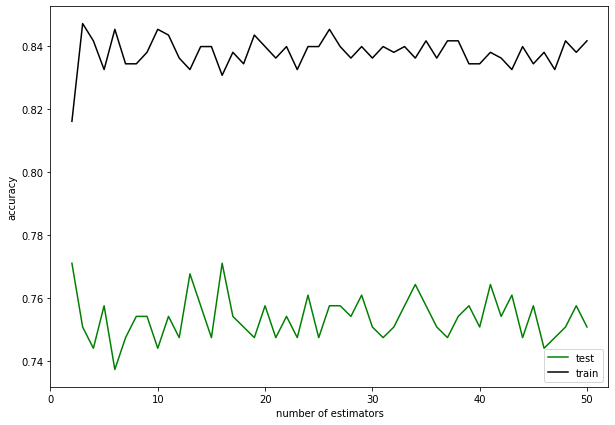

In [173]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

In [174]:
print(f"max accuracy for test data: {max(accuracies_test.values())}")
print(f"accuracy for test data for 11 estimators: {accuracies_test[11]}")

max accuracy for test data: 0.7710437710437711
accuracy for test data for 11 estimators: 0.7542087542087542


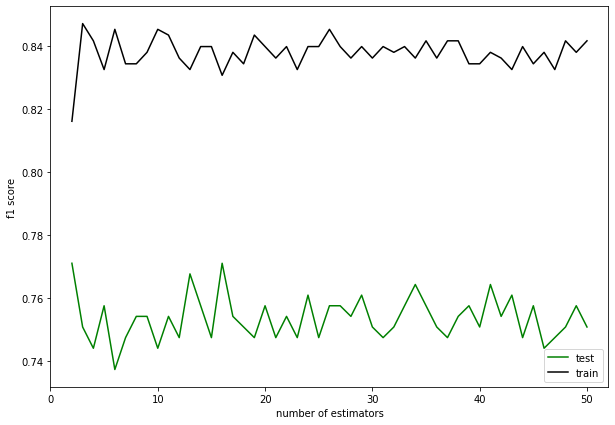

In [175]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [176]:
print(f"max accuracy for test data: {max(accuracies_test.values())}")
print(f"accuracy for test data for 11 estimators: {accuracies_test[11]}")

max accuracy for test data: 0.7710437710437711
accuracy for test data for 11 estimators: 0.7542087542087542


Bagging with Decision Trees

In [177]:
accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}

for i in range(2, 51):
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=i, bootstrap=True)
    bagging.fit(X_train_std, y_train_std)
    
    y_pred_test = bagging.predict(X_test_std)
    y_pred_train = bagging.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

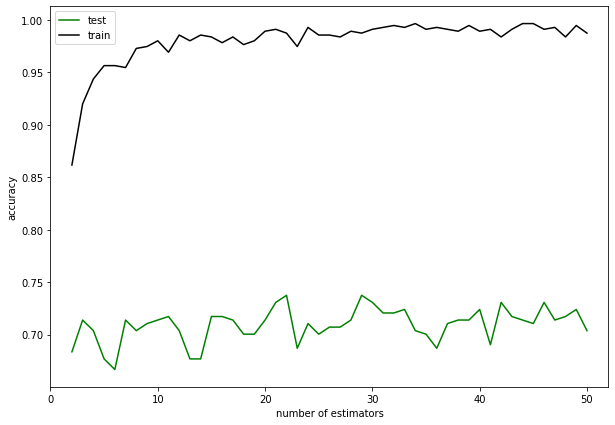

In [178]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

In [179]:
print(f"max accuracy for test data: {max(accuracies_test.values())}")
print(f"accuracy for test data for 11 estimators: {accuracies_test[11]}")

max accuracy for test data: 0.7373737373737373
accuracy for test data for 11 estimators: 0.7171717171717171


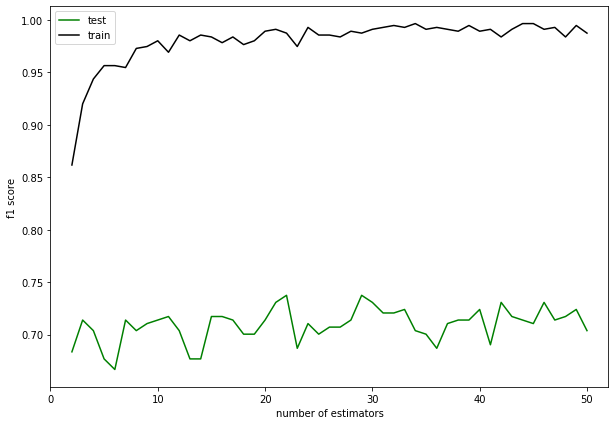

In [180]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [181]:
print(f"max f1 score for test data: {max(f1_scores_test.values())}")
print(f"f1 score for test data for 11 estimators: {f1_scores_test[11]}")

max f1 score for test data: 0.7373737373737375
f1 score for test data for 11 estimators: 0.7171717171717171


**Conclusion**

Test data always shows accuracy and f1 score much worse than train data.
The optimal number of estimators is hard to retrieve from metrics plots. I would chose not large value with high accuracy and f1 score for test data.

In [197]:
# used in part 2.8
best_lr_n_estimators = 11
best_dt_n_estimators = 11

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}
for i in range(2, 51):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train_std, y_train_std)
    
    y_pred_test = rf.predict(X_test_std)
    y_pred_train = rf.predict(X_train_std)
    
    accuracies_test[i] = accuracy_score(y_test_std, y_pred_test)
    accuracies_train[i] = accuracy_score(y_train_std, y_pred_train)
    
    f1_scores_test[i] = f1_score(y_test_std, y_pred_test, average='micro')
    f1_scores_train[i] = f1_score(y_train_std, y_pred_train, average='micro')

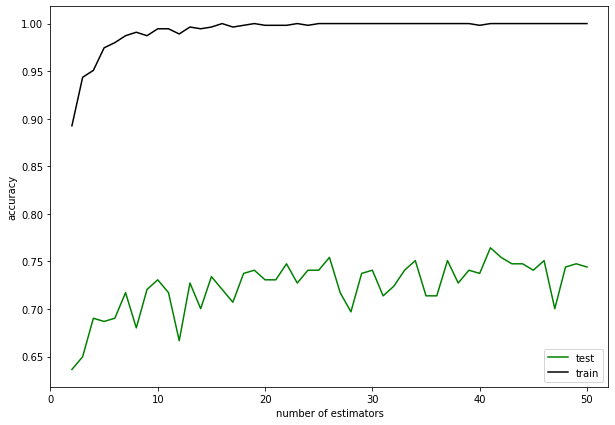

In [189]:
# accuracy scores plot
plt.figure(figsize=(10,7))
plt.plot(list(accuracies_test.keys()), list(accuracies_test.values()), color='g', label="test")
plt.plot(list(accuracies_train.keys()), list(accuracies_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.xlim(0, 52)
plt.legend()

In [191]:
print(f"max accuracy for test data: {max(accuracies_test.values())}")
print(f"accuracy for test data for 10 estimators: {accuracies_test[10]}")

max accuracy for test data: 0.7643097643097643
accuracy for test data for 10 estimators: 0.7306397306397306


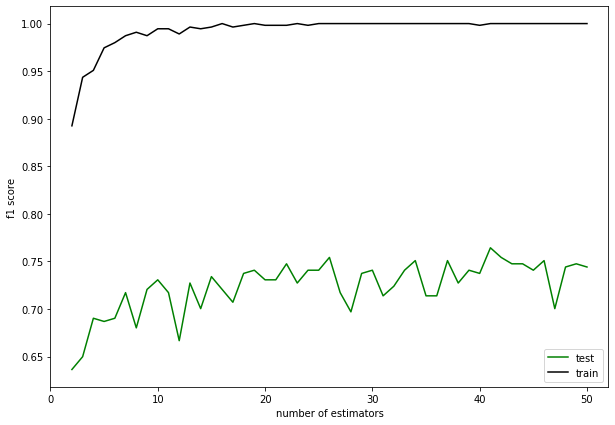

In [192]:
# f1 scores plot
plt.figure(figsize=(10,7))
plt.plot(list(f1_scores_test.keys()), list(f1_scores_test.values()), color='g', label="test")
plt.plot(list(f1_scores_train.keys()), list(f1_scores_train.values()), color='k', label="train")
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.xlim(0, 52)
plt.legend()

In [194]:
print(f"max f1 score for test data: {max(f1_scores_test.values())}")
print(f"f1 score for test data for 10 estimators: {f1_scores_test[10]}")

max f1 score for test data: 0.7643097643097643
f1 score for test data for 10 estimators: 0.7306397306397306


**Conclusion**

Using the same logic to chose the optimal number of estimators - not large number with high scores on test data.

In [195]:
# used in part 2.8
best_rf_n_estimators = 10

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [198]:
lr = LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty, 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=10000)

dt = DecisionTreeClassifier(max_depth=best_max_depth)

bg_dt = BaggingClassifier(
    DecisionTreeClassifier(max_depth=best_max_depth), 
    n_estimators=best_dt_n_estimators, 
    bootstrap=True)

bg_lr = BaggingClassifier(
    LogisticRegression(
            C=best_lr_c,
            penalty=best_lr_penalty, 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=100000),
    n_estimators=best_lr_n_estimators, 
    bootstrap=True)

rf = RandomForestClassifier(n_estimators=best_rf_n_estimators)

In [221]:
accuracies_test = {}
accuracies_train = {}
f1_scores_test = {}
f1_scores_train = {}
    
def calculate_metrics(model, name):
    accuracies_test[name] = {}
    accuracies_train[name] = {}
    f1_scores_test[name] = {}
    f1_scores_train[name] = {}

    for i in range(1, 10):
        model.fit(X_train_std[0:i*58], y_train_std[0:i*58])
        
        y_pred_test = model.predict(X_test_std)
        y_pred_train = model.predict(X_train_std)

        accuracies_test[name][i*58] = accuracy_score(y_test_std, y_pred_test)
        accuracies_train[name][i*58] = accuracy_score(y_train_std, y_pred_train)

        f1_scores_test[name][i*58] = f1_score(y_test_std, y_pred_test, average='micro')
        f1_scores_train[name][i*58] = f1_score(y_train_std, y_pred_train, average='micro')


In [222]:
calculate_metrics(lr, "lr")

In [223]:
calculate_metrics(dt, "dt")

In [224]:
calculate_metrics(bg_dt, "bg_dt")

In [225]:
calculate_metrics(bg_lr, "bg_lr")

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [226]:
calculate_metrics(rf, "rf")

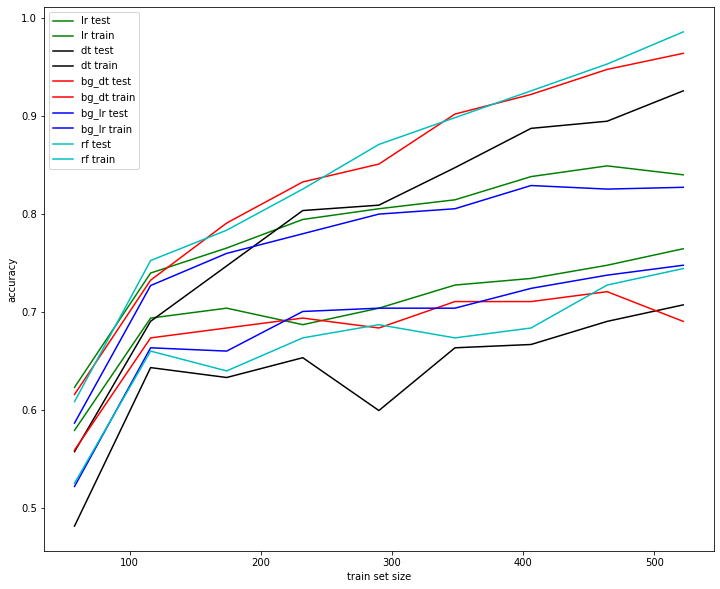

In [229]:
plt.figure(figsize=(12,10))
plt.plot(list(accuracies_test["lr"].keys()), list(accuracies_test["lr"].values()), color='g', label="lr test")
plt.plot(list(accuracies_train["lr"].keys()), list(accuracies_train["lr"].values()), color='g', label="lr train")
    
plt.plot(list(accuracies_test["dt"].keys()), list(accuracies_test["dt"].values()), color='k', label="dt test")
plt.plot(list(accuracies_train["dt"].keys()), list(accuracies_train["dt"].values()), color='k', label="dt train")

plt.plot(list(accuracies_test["bg_dt"].keys()), list(accuracies_test["bg_dt"].values()), color='r', label="bg_dt test")
plt.plot(list(accuracies_train["bg_dt"].keys()), list(accuracies_train["bg_dt"].values()), color='r', label="bg_dt train")

plt.plot(list(accuracies_test["bg_lr"].keys()), list(accuracies_test["bg_lr"].values()), color='b', label="bg_lr test")
plt.plot(list(accuracies_train["bg_lr"].keys()), list(accuracies_train["bg_lr"].values()), color='b', label="bg_lr train")

plt.plot(list(accuracies_test["rf"].keys()), list(accuracies_test["rf"].values()), color='c', label="rf test")
plt.plot(list(accuracies_train["rf"].keys()), list(accuracies_train["rf"].values()), color='c', label="rf train")

plt.xlabel('train set size')
plt.ylabel('accuracy')
plt.legend()

**Conclusion**

The quality of all the models grows with train set size increasing, not paing attention to some anomalies. 

Logistic regression, thogh shows smaller accuracy on the train set, performs better on the test set.

a single decision tree shows a good accuracy on the train set, but works poorly on the test set.